In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
airline_data_df = pd.read_csv("airline-passenger-traffic.csv")
#airline_data_df = pd.read_csv("exchange-rate-twi.csv")


In [3]:
airline_data_df.head(15)


,1949-01,112
0,1949-02,118.0
1,1949-03,132.0
2,1949-04,129.0
3,1949-05,121.0
4,1949-06,135.0
5,1949-07,148.0
6,1949-08,148.0
7,1949-09,136.0
8,1949-10,119.0
9,1949-11,104.0


In [4]:
airline_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143 entries, 0 to 142
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   1949-01  143 non-null    object 
 1   112      139 non-null    float64
dtypes: float64(1), object(1)
memory usage: 2.4+ KB


In [5]:
airline_data_df.columns = ['date', 'passenger_count']

In [6]:
airline_data_df['date'] = pd.to_datetime(airline_data_df['date'], format='%Y-%m')
#airline_data_df['date'] = pd.to_datetime(airline_data_df['date'], format='%b-%y')

In [7]:
airline_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143 entries, 0 to 142
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   date             143 non-null    datetime64[ns]
 1   passenger_count  139 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 2.4 KB


In [8]:
airline_data_df.head()

,date,passenger_count
0,1949-02-01,118.0
1,1949-03-01,132.0
2,1949-04-01,129.0
3,1949-05-01,121.0
4,1949-06-01,135.0


In [9]:
# Time Series ANalysis

In [10]:
airline_data_df= airline_data_df.set_index('date')

In [11]:
airline_data_df.head()

,passenger_count
date,
1949-02-01,118.0
1949-03-01,132.0
1949-04-01,129.0
1949-05-01,121.0
1949-06-01,135.0


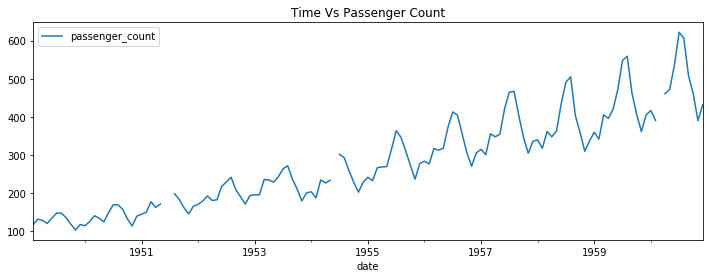

In [12]:
# Plot the axis
airline_data_df.plot(figsize=(12,4))
plt.legend(loc='best')
plt.title("Time Vs Passenger Count")
plt.show()

In [13]:
# Missing value imputation

# Type 01 - Mean value

mean_imputation = airline_data_df.fillna(airline_data_df['passenger_count'].mean())

In [14]:
airline_data_df['passenger_count'].mean()

281.9496402877698

In [15]:
airline_data_df_dd = airline_data_df.passenger_count.fillna(method = 'backfill')

In [16]:
airline_data_df_dd.mean()

282.1818181818182

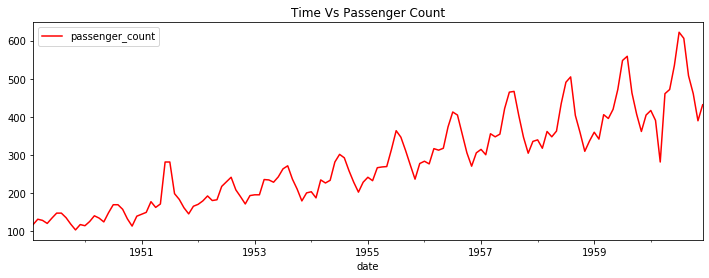

In [17]:
# Plot the axis
#airline_data_df.plot(figsize=(12,4))
mean_imputation.plot(figsize=(12,4), color = 'red')
plt.legend(loc='best')
plt.title("Time Vs Passenger Count")
plt.show()

In [18]:
# Type 02 - Linear Imputation 
linear_imputation = airline_data_df.passenger_count.interpolate(method ='linear')

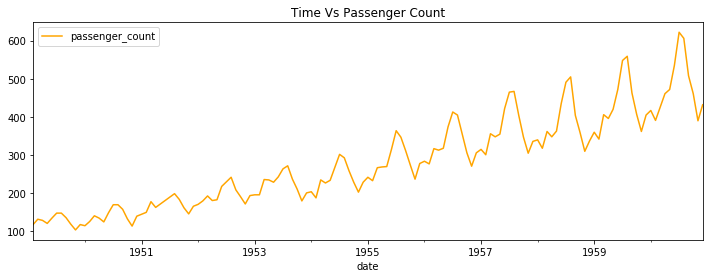

In [19]:
# Plot the axis
#airline_data_df.plot(figsize=(12,4))
linear_imputation.plot(figsize=(12,4), color = 'orange')
plt.legend(loc='best')
plt.title("Time Vs Passenger Count")
plt.show()

In [20]:
linear_imputation.mean()

281.5104895104895

In [21]:
data = pd.DataFrame(linear_imputation, columns=['passenger_count'])

In [22]:
data

,passenger_count
date,
1949-02-01,118.0
1949-03-01,132.0
1949-04-01,129.0
1949-05-01,121.0
1949-06-01,135.0
...,...
1960-08-01,606.0
1960-09-01,508.0
1960-10-01,461.0


In [23]:
# Outlier Analysis

In [24]:
import seaborn as sns

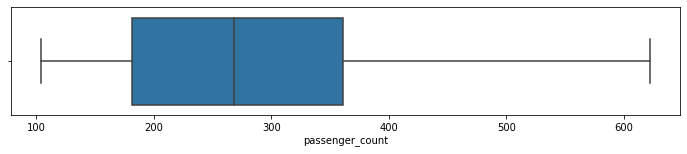

In [25]:
fig= plt.subplots(figsize=(12,2))
ax = sns.boxplot(data['passenger_count'], whis =1.5)

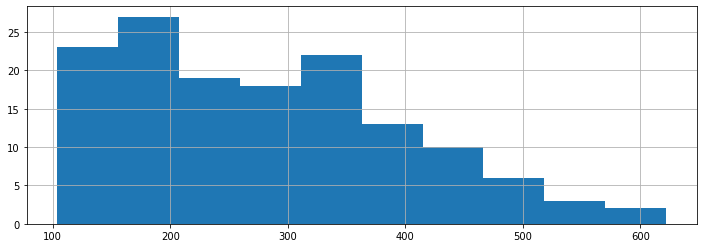

In [26]:
fig = data.passenger_count.hist(figsize=(12,4))

In [27]:
# Time Series Decomposition

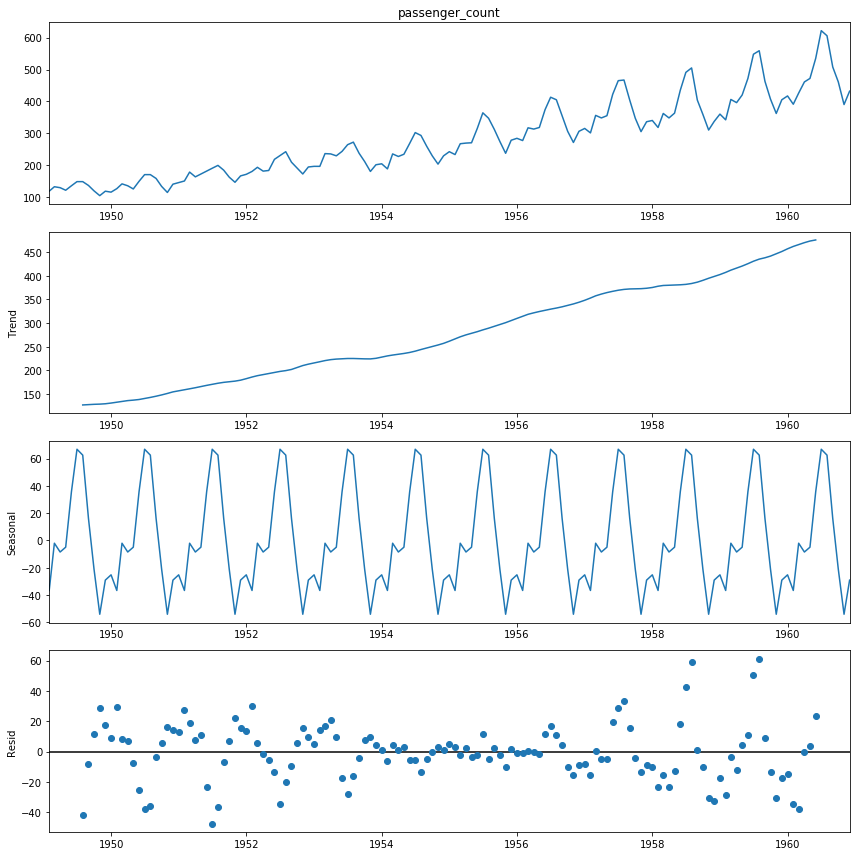

In [28]:
# Additive Seasonal Decompostion
from pylab import rcParams
import statsmodels.api as sm
rcParams['figure.figsize'] = 12,12
decomposition = sm.tsa.seasonal_decompose(data.passenger_count, model='additive')
fig = decomposition.plot()
plt.show()

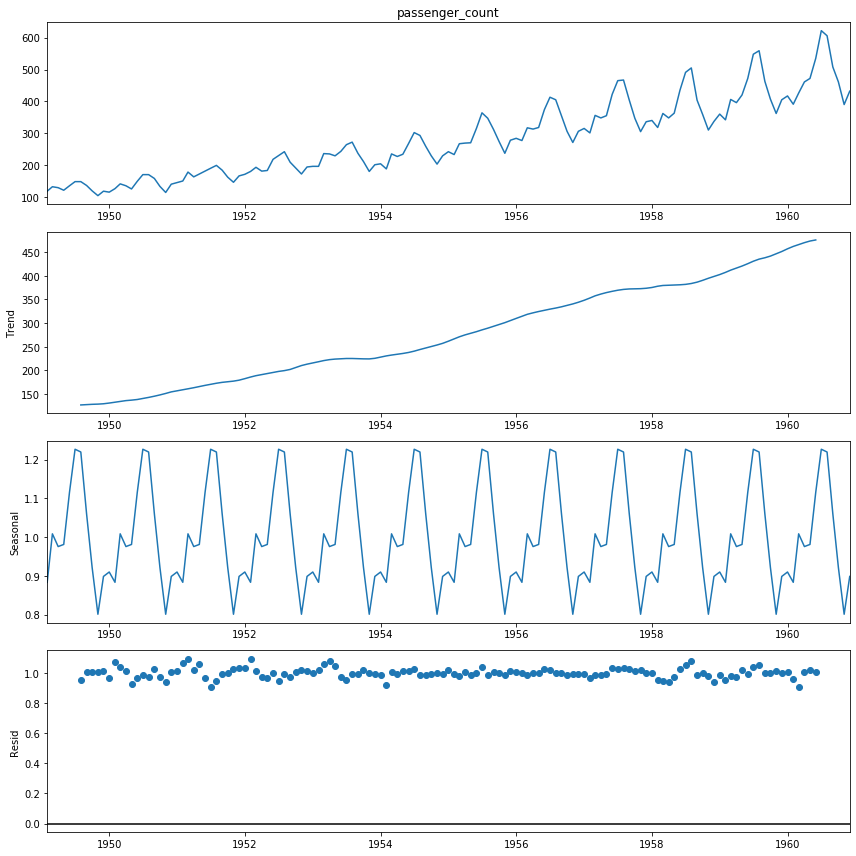

In [29]:
# Multiplicative Seasonal Decompostion
rcParams['figure.figsize'] = 12,12
decomposition = sm.tsa.seasonal_decompose(data.passenger_count, model='multilplcative')
fig = decomposition.plot()
plt.show()

In [30]:
# Build and evaluate the time series model

In [31]:
# Train test split
train_len = 120
train = data[:train_len]
test = data[train_len:]

In [32]:
train.head()

,passenger_count
date,
1949-02-01,118.0
1949-03-01,132.0
1949-04-01,129.0
1949-05-01,121.0
1949-06-01,135.0


In [33]:
# Naive Method
y_hat_naive = test.copy()
y_hat_naive['forecast'] = train['passenger_count'][train_len-1]


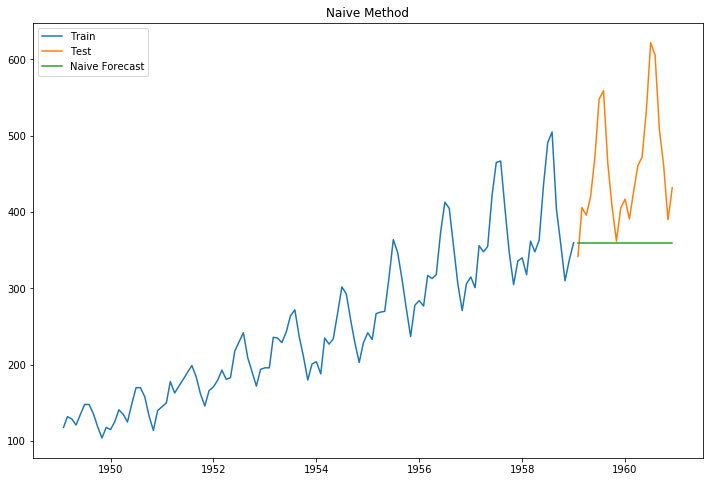

In [34]:
# Plot the forecast
plt.figure(figsize=(12,8))
plt.plot(train['passenger_count'], label= 'Train')
plt.plot(test['passenger_count'], label= 'Test')
plt.plot(y_hat_naive['forecast'], label= 'Naive Forecast')
plt.legend(loc='best')
plt.title("Naive Method")
plt.show()

In [35]:
# Calculate RMSE and MAPE to evaluate forecast
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(test['passenger_count'], y_hat_naive['forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['passenger_count']-y_hat_naive['forecast'])/test['passenger_count'])*100, 2)
                
results = pd.DataFrame({'method':['Naive Method'], 'RMSE':[rmse], 'MAPE':[mape]})
results = results[['method','RMSE', "MAPE"]]  
results

,method,RMSE,MAPE
0,Naive Method,121.4,19.68


In [36]:
# Simple Average method 
y_hat_avg = test.copy()
y_hat_avg['forecast'] = train['passenger_count'].mean()

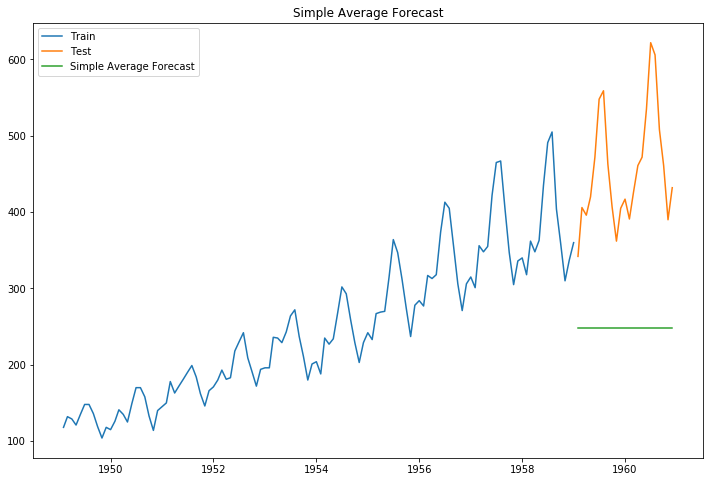

In [37]:
# Plot the forecast
plt.figure(figsize=(12,8))
plt.plot(train['passenger_count'], label= 'Train')
plt.plot(test['passenger_count'], label= 'Test')
plt.plot(y_hat_avg['forecast'], label= 'Simple Average Forecast')
plt.legend(loc='best')
plt.title("Simple Average Forecast")
plt.show()

In [38]:
rmse = np.sqrt(mean_squared_error(test['passenger_count'], y_hat_avg['forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['passenger_count']-y_hat_avg['forecast'])/test['passenger_count'])*100, 2)
Tempresults = pd.DataFrame({'method':['Simple Average Method'], 'RMSE':[rmse], 'MAPE':[mape]})
Tempresults = Tempresults[['method','RMSE', "MAPE"]]  
Tempresults

,method,RMSE,MAPE
0,Simple Average Method,221.2,44.36


In [39]:
results = pd.concat([results, Tempresults])
results

,method,RMSE,MAPE
0,Naive Method,121.4,19.68
0,Simple Average Method,221.2,44.36


In [40]:
# Time Series Cross Validation 
# 1. One step Validation
# 2. Multistep Validation

In [41]:
# Moving Average Method
# Moving window average - window - 12 months, 6 months

In [42]:
y_hat_sma = data.copy()
m_window = 12
y_hat_sma['sma_forecasting'] = y_hat_sma['passenger_count'].rolling(m_window).mean()
# test data is not available so keep the fix value of last forecasted
y_hat_sma['sma_forecasting'][train_len:] = y_hat_sma['sma_forecasting'][train_len-1]

In [43]:
y_hat_sma.tail()

,passenger_count,sma_forecasting
date,,
1960-08-01,606.0,382.666667
1960-09-01,508.0,382.666667
1960-10-01,461.0,382.666667
1960-11-01,390.0,382.666667
1960-12-01,432.0,382.666667


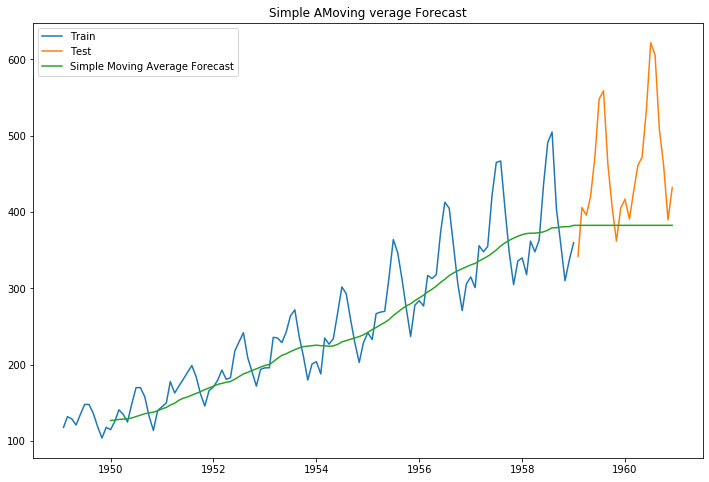

In [44]:
# Plot the forecast
plt.figure(figsize=(12,8))
plt.plot(train['passenger_count'], label= 'Train')
plt.plot(test['passenger_count'], label= 'Test')
plt.plot(y_hat_sma['sma_forecasting'], label= 'Simple Moving Average Forecast')
plt.legend(loc='best')
plt.title("Simple AMoving verage Forecast")
plt.show()

In [45]:
rmse = np.sqrt(mean_squared_error(test['passenger_count'], y_hat_sma['sma_forecasting'][train_len:])).round(2)
mape = np.round(np.mean(np.abs(test['passenger_count']-y_hat_sma['sma_forecasting'][train_len:])/test['passenger_count'])*100, 2)
Tempresults = pd.DataFrame({'method':['Simple Moving Average Method'], 'RMSE':[rmse], 'MAPE':[mape]})
Tempresults = Tempresults[['method','RMSE', "MAPE"]]  
Tempresults

,method,RMSE,MAPE
0,Simple Moving Average Method,104.28,15.67


In [46]:
results = pd.concat([results, Tempresults])
results

,method,RMSE,MAPE
0,Naive Method,121.40,19.68
0,Simple Average Method,221.20,44.36
0,Simple Moving Average Method,104.28,15.67


In [47]:
# 6 month window size
y_hat_sma = data.copy()
m_window = 6
y_hat_sma['sma_forecasting'] = y_hat_sma['passenger_count'].rolling(m_window).mean()
# test data is not available so keep the fix value of last forecasted
y_hat_sma['sma_forecasting'][train_len:] = y_hat_sma['sma_forecasting'][train_len-1]

In [48]:
y_hat_sma['sma_forecasting'][train_len-1]

379.1666666666667

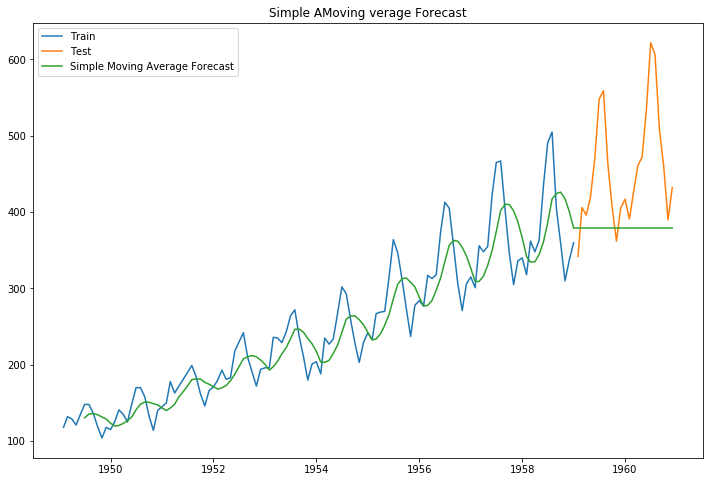

In [49]:
# Plot the forecast
plt.figure(figsize=(12,8))
plt.plot(train['passenger_count'], label= 'Train')
plt.plot(test['passenger_count'], label= 'Test')
plt.plot(y_hat_sma['sma_forecasting'], label= 'Simple Moving Average Forecast')
plt.legend(loc='best')
plt.title("Simple AMoving verage Forecast")
plt.show()

In [50]:
rmse = np.sqrt(mean_squared_error(test['passenger_count'], y_hat_sma['sma_forecasting'][train_len:])).round(2)
mape = np.round(np.mean(np.abs(test['passenger_count']-y_hat_sma['sma_forecasting'][train_len:])/test['passenger_count'])*100, 2)
Tempresults = pd.DataFrame({'method':['Simple Moving 6 month Average Method'], 'RMSE':[rmse], 'MAPE':[mape]})
Tempresults = Tempresults[['method','RMSE', "MAPE"]]  
Tempresults

,method,RMSE,MAPE
0,Simple Moving 6 month Average Method,106.78,16.28


In [51]:
results = pd.concat([results, Tempresults])
results

,method,RMSE,MAPE
0,Naive Method,121.40,19.68
0,Simple Average Method,221.20,44.36
0,Simple Moving Average Method,104.28,15.67
0,Simple Moving 6 month Average Method,106.78,16.28


In [52]:
# Simple Exponential Smoothing 

from statsmodels.tsa.holtwinters import SimpleExpSmoothing


In [53]:
model = SimpleExpSmoothing(train['passenger_count'])
model_fit = model.fit(smoothing_level =0.15, optimized =False)
model_fit.params
y_hat_ses = test.copy()
y_hat_ses['forecast'] = model_fit.forecast(24)

/home/santosh/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


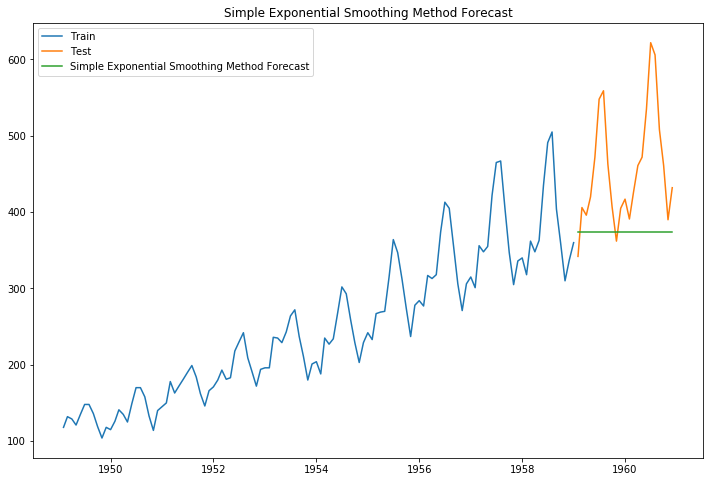

In [54]:
# Plot the forecast
plt.figure(figsize=(12,8))
plt.plot(train['passenger_count'], label= 'Train')
plt.plot(test['passenger_count'], label= 'Test')
plt.plot(y_hat_ses['forecast'], label= 'Simple Exponential Smoothing Method Forecast')
plt.legend(loc='best')
plt.title("Simple Exponential Smoothing Method Forecast")
plt.show()

In [55]:
rmse = np.sqrt(mean_squared_error(test['passenger_count'], y_hat_ses['forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['passenger_count']-y_hat_ses['forecast'])/test['passenger_count'])*100, 2)
Tempresults = pd.DataFrame({'method':['Simple Exponential Smoothing  Method'], 'RMSE':[rmse], 'MAPE':[mape]})
Tempresults = Tempresults[['method','RMSE', "MAPE"]]  
Tempresults

,method,RMSE,MAPE
0,Simple Exponential Smoothing Method,110.48,17.16


In [56]:
results = pd.concat([results, Tempresults])
results

,method,RMSE,MAPE
0,Naive Method,121.40,19.68
0,Simple Average Method,221.20,44.36
0,Simple Moving Average Method,104.28,15.67
0,Simple Moving 6 month Average Method,106.78,16.28
0,Simple Exponential Smoothing Method,110.48,17.16


#### Exponential Smoothing with level and Trend
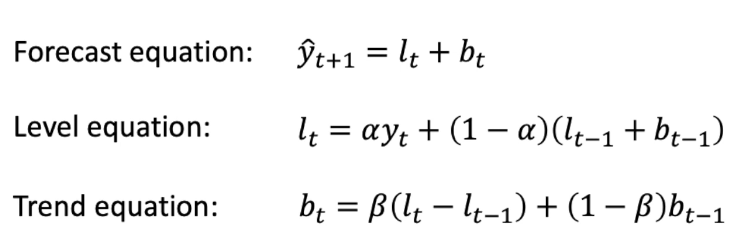

In [57]:
# Exponential Smooting -- Trend & Level
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [58]:
model = ExponentialSmoothing(np.array(train['passenger_count']), seasonal_periods=12, trend = 'additive', seasonal=None)
model_fit = model.fit(smoothing_level =0.2, smoothing_slope = 0.01, optimized =False)
print(model_fit.params)
y_hat_holt = test.copy()
y_hat_holt['forecast'] = model_fit.forecast(len(test))

{'smoothing_level': 0.2, 'smoothing_slope': 0.01, 'smoothing_seasonal': None, 'damping_slope': nan, 'initial_level': 118.0, 'initial_slope': 14.0, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


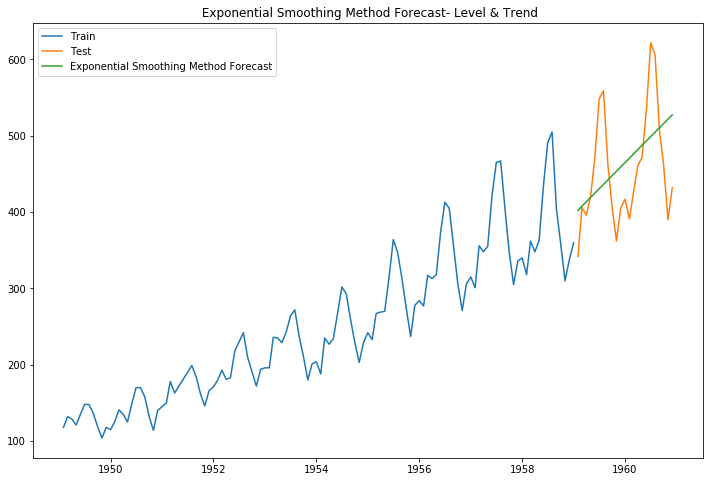

In [59]:
# Plot the forecast
plt.figure(figsize=(12,8))
plt.plot(train['passenger_count'], label= 'Train')
plt.plot(test['passenger_count'], label= 'Test')
plt.plot(y_hat_holt['forecast'], label= 'Exponential Smoothing Method Forecast')
plt.legend(loc='best')
plt.title(" Exponential Smoothing Method Forecast- Level & Trend")
plt.show()

In [60]:
rmse = np.sqrt(mean_squared_error(test['passenger_count'], y_hat_holt['forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['passenger_count']-y_hat_holt['forecast'])/test['passenger_count'])*100, 2)
Tempresults = pd.DataFrame({'method':['Exponential Smoothing  Method Level & Trend'], 'RMSE':[rmse], 'MAPE':[mape]})
Tempresults = Tempresults[['method','RMSE', "MAPE"]]  
Tempresults

,method,RMSE,MAPE
0,Exponential Smoothing Method Level & Trend,71.27,12.75


In [61]:
results = pd.concat([results, Tempresults])
results

,method,RMSE,MAPE
0,Naive Method,121.40,19.68
0,Simple Average Method,221.20,44.36
0,Simple Moving Average Method,104.28,15.67
0,Simple Moving 6 month Average Method,106.78,16.28
0,Simple Exponential Smoothing Method,110.48,17.16
0,Exponential Smoothing Method Level & Trend,71.27,12.75


### Exponential Smooting Forecasting Method - Level , Trend & Seasonality
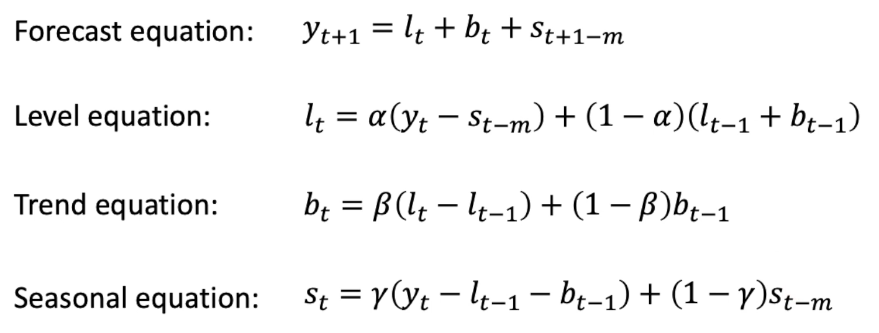

In [62]:

model = ExponentialSmoothing(np.array(train['passenger_count']), seasonal_periods=12, trend = 'additive', seasonal='additive')
model_fit = model.fit(optimized =True)
print(model_fit.params)
y_hat_holts = test.copy()
y_hat_holts['forecast'] = model_fit.forecast(len(test))

{'smoothing_level': 0.26315789253494787, 'smoothing_slope': 0.05053476576046327, 'smoothing_seasonal': 0.7368421030612636, 'damping_slope': nan, 'initial_level': 206.84459912094616, 'initial_slope': 2.094339946154852, 'initial_seasons': array([ -90.22522168,  -76.40602818,  -79.66930275,  -87.75806099,
        -73.74482842,  -60.81774526,  -61.01333514,  -73.21638919,
        -90.37117985, -105.25650721,  -90.91911285,  -93.85787778]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


/home/santosh/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


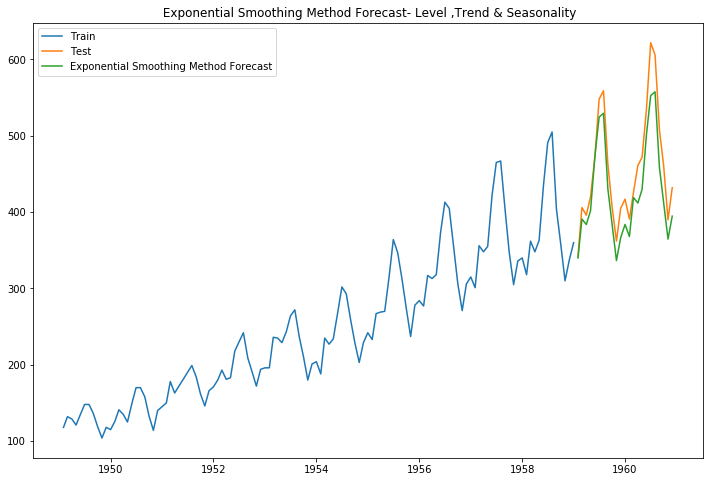

In [63]:
# Plot the forecast
plt.figure(figsize=(12,8))
plt.plot(train['passenger_count'], label= 'Train')
plt.plot(test['passenger_count'], label= 'Test')
plt.plot(y_hat_holts['forecast'], label= 'Exponential Smoothing Method Forecast')
plt.legend(loc='best')
plt.title(" Exponential Smoothing Method Forecast- Level ,Trend & Seasonality")
plt.show()

In [64]:
rmse = np.sqrt(mean_squared_error(test['passenger_count'], y_hat_holts['forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['passenger_count']-y_hat_holts['forecast'])/test['passenger_count'])*100, 2)
Tempresults = pd.DataFrame({'method':['Exponential Smoothing  Method Level ,Trend & Sesnality'], 'RMSE':[rmse], 'MAPE':[mape]})
Tempresults = Tempresults[['method','RMSE', "MAPE"]]  
Tempresults

,method,RMSE,MAPE
0,"Exponential Smoothing Method Level ,Trend & S...",34.13,6.37


In [65]:
results = pd.concat([results, Tempresults])
results

,method,RMSE,MAPE
0,Naive Method,121.40,19.68
0,Simple Average Method,221.20,44.36
0,Simple Moving Average Method,104.28,15.67
0,Simple Moving 6 month Average Method,106.78,16.28
0,Simple Exponential Smoothing Method,110.48,17.16
0,Exponential Smoothing Method Level & Trend,71.27,12.75
0,"Exponential Smoothing Method Level ,Trend & S...",34.13,6.37


In [66]:
# Holt winters Multiplicative Trend and Seasonality

In [67]:

model = ExponentialSmoothing(np.array(train['passenger_count']), seasonal_periods=12, trend = 'additive', seasonal='multiplicative')
model_fit = model.fit(optimized =True)
print(model_fit.params)
y_hat_holtsm = test.copy()
y_hat_holtsm['forecast'] = model_fit.forecast(len(test))

{'smoothing_level': 0.3157894736526667, 'smoothing_slope': 0.05263126447167998, 'smoothing_seasonal': 0.6842105262842456, 'damping_slope': nan, 'initial_level': 208.69981154945492, 'initial_slope': 1.2712443485684086, 'initial_seasons': array([0.58965376, 0.64430462, 0.61485636, 0.56784817, 0.63010543,
       0.69306307, 0.69284049, 0.63396818, 0.55133878, 0.48738474,
       0.56998034, 0.56536063]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


/home/santosh/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


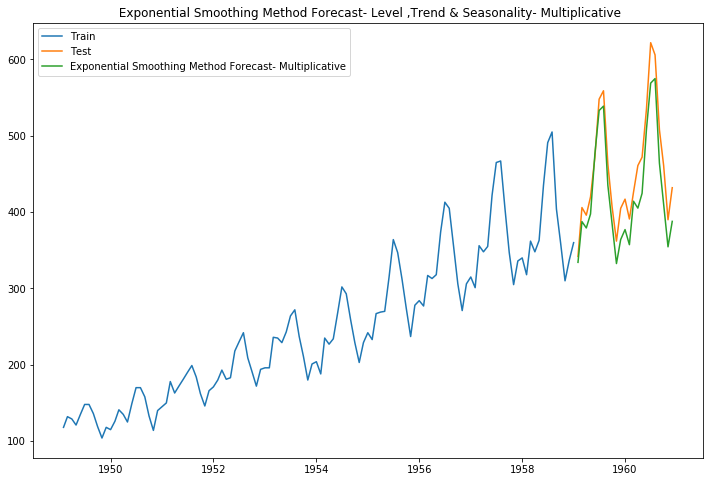

In [68]:
# Plot the forecast
plt.figure(figsize=(12,8))
plt.plot(train['passenger_count'], label= 'Train')
plt.plot(test['passenger_count'], label= 'Test')
plt.plot(y_hat_holtsm['forecast'], label= 'Exponential Smoothing Method Forecast- Multiplicative')
plt.legend(loc='best')
plt.title(" Exponential Smoothing Method Forecast- Level ,Trend & Seasonality- Multiplicative")
plt.show()

In [69]:
rmse = np.sqrt(mean_squared_error(test['passenger_count'], y_hat_holtsm['forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['passenger_count']-y_hat_holtsm['forecast'])/test['passenger_count'])*100, 2)
Tempresults = pd.DataFrame({'method':['Exponential Smoothing  Method Level ,Trend & Sesnality'], 'RMSE':[rmse], 'MAPE':[mape]})
Tempresults = Tempresults[['method','RMSE', "MAPE"]]  
Tempresults

,method,RMSE,MAPE
0,"Exponential Smoothing Method Level ,Trend & S...",33.63,6.69


In [70]:
results = pd.concat([results, Tempresults])
results

,method,RMSE,MAPE
0,Naive Method,121.40,19.68
0,Simple Average Method,221.20,44.36
0,Simple Moving Average Method,104.28,15.67
0,Simple Moving 6 month Average Method,106.78,16.28
0,Simple Exponential Smoothing Method,110.48,17.16
0,Exponential Smoothing Method Level & Trend,71.27,12.75
0,"Exponential Smoothing Method Level ,Trend & S...",34.13,6.37
0,"Exponential Smoothing Method Level ,Trend & S...",33.63,6.69


In [71]:
# Auto Regressive Models
# 1. Stationary & Non stationary time series


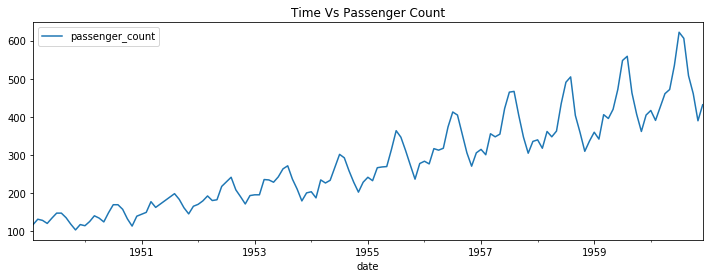

In [72]:
# Plot the axis
data.plot(figsize=(12,4))
plt.legend(loc='best')
plt.title("Time Vs Passenger Count")
plt.show()

In [73]:
# Augmented -Dickey Fuller (ADF) test
from statsmodels.tsa.stattools import adfuller


In [74]:
adf_test = adfuller(data['passenger_count'])

print("Statistics", adf_test[0])
print("Critical Value @ 0.05%: ",adf_test[4]['5%'])
print("p value ",adf_test[1])

Statistics 0.8662877034110271
Critical Value @ 0.05%:  -2.8842185101614626
p value  0.9926342166999336


In [75]:
adf_test

(0.8662877034110271,
 0.9926342166999336,
 13,
 129,
 {'1%': -3.482087964046026,
  '5%': -2.8842185101614626,
  '10%': -2.578864381347275},
 987.0122130671183)

In [76]:
# KPSS test 
from statsmodels.tsa.stattools import kpss

In [77]:
kpss_test = kpss(data['passenger_count'])

print("Statistics", kpss_test[0])
print("Critical Value @ 0.05%: ",kpss_test[3]['5%'])
print("p value ",kpss_test[1])

Statistics 1.0448401652734178
Critical Value @ 0.05%:  0.463
p value  0.01


/home/santosh/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:1661: FutureWarning: The behavior of using lags=None will change in the next release. Currently lags=None is the same as lags='legacy', and so a sample-size lag length is used. After the next release, the default will change to be the same as lags='auto' which uses an automatic lag length selection method. To silence this warning, either use 'auto' or 'legacy'
  warn(msg, FutureWarning)
/home/santosh/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:1685: InterpolationWarning: p-value is smaller than the indicated p-value
  warn("p-value is smaller than the indicated p-value", InterpolationWarning)


In [78]:
# Non Stationary to Stationary Series
# 1. Differencing 
#  2. Transforming - BOx Cox Transformation from the family of power transformer indexed by parameter lambda
 # It helps in making variance constant

 #   formulat of box cox transformation below

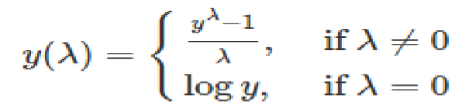

In [79]:
#Box COx Transformation
from scipy.stats import boxcox

In [80]:
boxcox_data = pd.Series(boxcox(data['passenger_count'], lmbda =0), index = data.index)

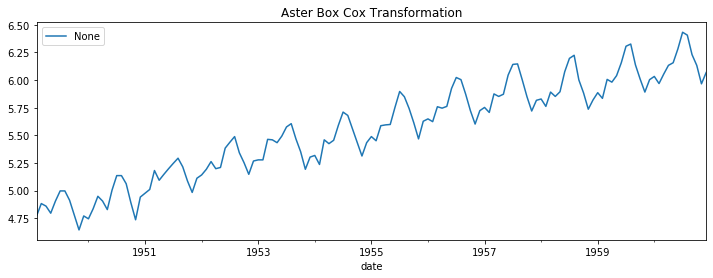

In [81]:
#data.plot(figsize=(12,4))
boxcox_data.plot(figsize=(12,4))
plt.legend(loc='best')
plt.title("Aster Box Cox Transformation")
plt.show()

In [82]:
# Differencing
data_boxcox_diff = pd.Series(boxcox_data - boxcox_data.shift(), index= data.index)
data_boxcox_diff.dropna(inplace= True)

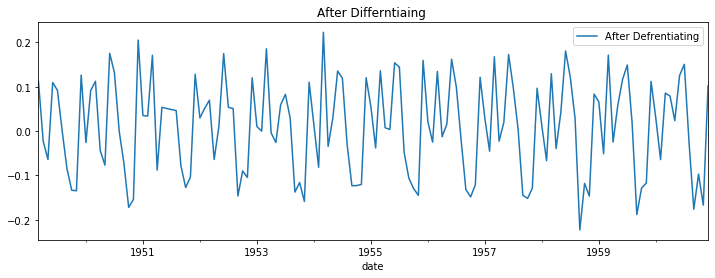

In [83]:
data_boxcox_diff.plot(figsize=(12,4), label = "After Defrentiating")
plt.legend(loc='best')
plt.title("After Differntiaing ")
plt.show()

In [84]:
## ADF TEst

adf_test = adfuller(data_boxcox_diff)

print("Statistics", adf_test[0])
print("Critical Value @ 0.05%: ",adf_test[4]['5%'])
print("p value ",adf_test[1])

Statistics -3.2673698832566185
Critical Value @ 0.05%:  -2.8842185101614626
p value  0.01640155483473559


In [85]:
# p value is less than 5% we can reject the null hypothesis --> which is data is not stationary

In [86]:
# KPSS test

kpss_test = kpss(data_boxcox_diff)

print("Statistics", kpss_test[0])
print("Critical Value @ 0.05%: ",kpss_test[3]['5%'])
print("p value ",kpss_test[1])

Statistics 0.09052263353731194
Critical Value @ 0.05%:  0.463
p value  0.1


/home/santosh/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:1661: FutureWarning: The behavior of using lags=None will change in the next release. Currently lags=None is the same as lags='legacy', and so a sample-size lag length is used. After the next release, the default will change to be the same as lags='auto' which uses an automatic lag length selection method. To silence this warning, either use 'auto' or 'legacy'
  warn(msg, FutureWarning)
/home/santosh/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:1687: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)


In [87]:
# P value is greater than 5% we are failed to reject the null hypothesis. it means that data is statitionary 

In [88]:
# ACF & PACF 
# Autocorrelation --> Relation between yt and y^t-k
# Partial Autocorrelation ---> 

In [89]:
# Autocorrelation Function plot --> direct and indrect relationship
from statsmodels.graphics.tsaplots import plot_acf

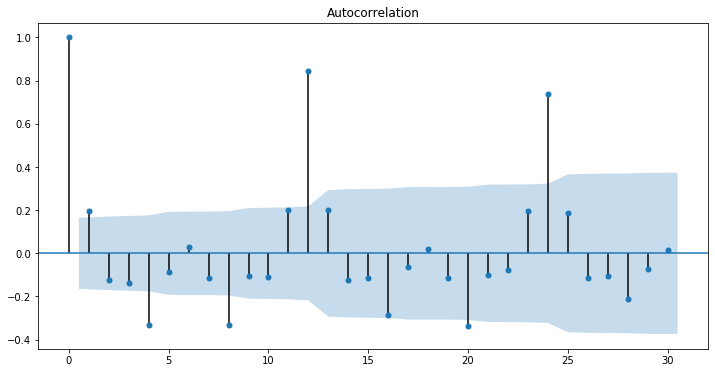

In [90]:
plt.figure(figsize=(12,6))
acf = plot_acf(data_boxcox_diff, ax =plt.gca(), lags= 30)
plt.show()

In [91]:
# Partial Autocorrelation Function PACF --> only direct relationship 
from statsmodels.graphics.tsaplots import plot_pacf

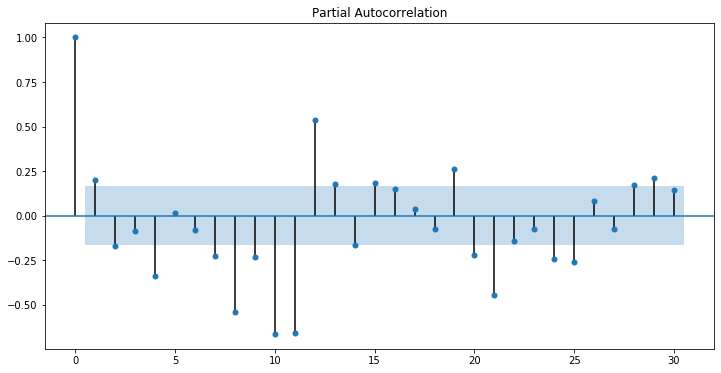

In [92]:
plt.figure(figsize=(12,6))
pacf = plot_pacf(data_boxcox_diff, ax =plt.gca(), lags= 30)
plt.show()

In [93]:
# Simple Auto Regressive model(AR)
# The simple autoregressive model forecasts the dependent variable (future observation)
#when one or more independent variables are known (past observations). 
#This model has a parameter ‘p’ called lag order. 
#Lag order is the maximum number of lags used to build ‘p’ number of past data points to predict future data points. 

In [94]:
# Train test split
train_data_boxcox_diff = data_boxcox_diff[:train_len-1]
test_data_boxcox_diff = data_boxcox_diff[train_len-1:]

train_boxcox_data = boxcox_data[:train_len]
test_boxcox_data = boxcox_data[train_len:]

In [95]:
# Auto Regression Method 
from statsmodels.tsa.arima_model import ARIMA

In [96]:
model = ARIMA(train_data_boxcox_diff, order=(1,0,0))
model_fit = model.fit()
print(model_fit.params)

const      0.009674
ar.L1.y    0.183689
dtype: float64


/home/santosh/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [97]:
# Recover original time series
y_hat_ar = data_boxcox_diff.copy()
y_hat_ar['ar_forecast_boxcox_diff'] = model_fit.predict(data_boxcox_diff.index.min(), data_boxcox_diff.index.max())
y_hat_ar['ar_forecast_boxcox'] = y_hat_ar['ar_forecast_boxcox_diff'].cumsum()
y_hat_ar['ar_forecast_boxcox']  = y_hat_ar['ar_forecast_boxcox'].add(boxcox_data[0])

y_hat_ar['ar_forecast'] = np.exp(y_hat_ar['ar_forecast_boxcox'])

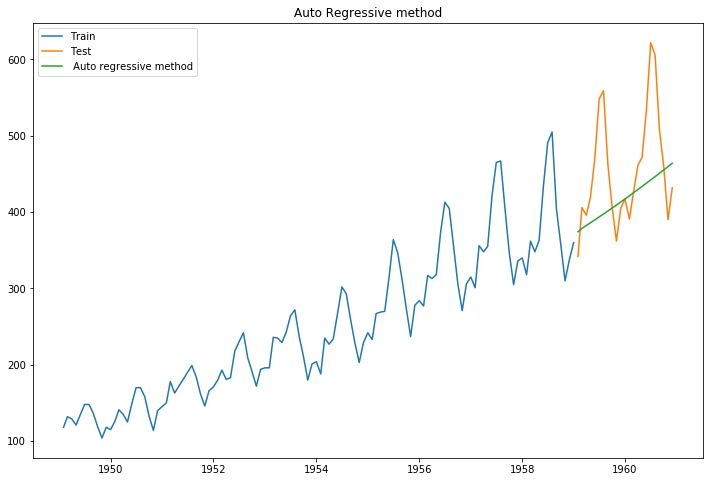

In [98]:
# Plot the forecast
plt.figure(figsize=(12,8))
plt.plot(train['passenger_count'], label= 'Train')
plt.plot(test['passenger_count'], label= 'Test')
plt.plot(y_hat_ar['ar_forecast'][test.index.min():], label= ' Auto regressive method')
plt.legend(loc='best')
plt.title("Auto Regressive method")
plt.show()

In [99]:
rmse = np.sqrt(mean_squared_error(test['passenger_count'], y_hat_ar['ar_forecast'][test.index.min():])).round(2)
mape = np.round(np.mean(np.abs(test['passenger_count']-y_hat_ar['ar_forecast'][test.index.min():])/test['passenger_count'])*100, 2)
Tempresults = pd.DataFrame({'method':['AutoRegressive Method'], 'RMSE':[rmse], 'MAPE':[mape]})
Tempresults = Tempresults[['method','RMSE', "MAPE"]]  
Tempresults

,method,RMSE,MAPE
0,AutoRegressive Method,79.56,11.52


In [100]:
results = pd.concat([results, Tempresults])
results

,method,RMSE,MAPE
0,Naive Method,121.40,19.68
0,Simple Average Method,221.20,44.36
0,Simple Moving Average Method,104.28,15.67
0,Simple Moving 6 month Average Method,106.78,16.28
0,Simple Exponential Smoothing Method,110.48,17.16
0,Exponential Smoothing Method Level & Trend,71.27,12.75
0,"Exponential Smoothing Method Level ,Trend & S...",34.13,6.37
0,"Exponential Smoothing Method Level ,Trend & S...",33.63,6.69
0,AutoRegressive Method,79.56,11.52


In [101]:
# Moving Average Model (MA)
#The Moving Average Model models the future forecasts using past forecast errors in a regression-like model. 
#This model has a parameter ‘q’ called window size, over which linear combination of errors are calculated.

In [102]:
model = ARIMA(train_data_boxcox_diff, order=(0,0,1))
model_fit = model.fit()
print(model_fit.params)

const      0.009669
ma.L1.y    0.268926
dtype: float64


/home/santosh/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [103]:
# Recover original time series
y_hat_ma = data_boxcox_diff.copy()
y_hat_ma['ma_forecast_boxcox_diff'] = model_fit.predict(data_boxcox_diff.index.min(), data_boxcox_diff.index.max())
y_hat_ma['ma_forecast_boxcox'] = y_hat_ma['ma_forecast_boxcox_diff'].cumsum()
y_hat_ma['ma_forecast_boxcox']  = y_hat_ma['ma_forecast_boxcox'].add(boxcox_data[0])

y_hat_ma['ma_forecast'] = np.exp(y_hat_ma['ma_forecast_boxcox'])

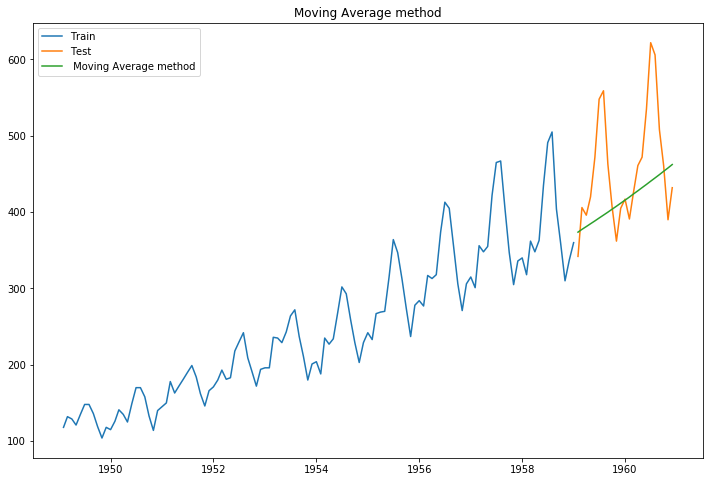

In [104]:
# Plot the forecast
plt.figure(figsize=(12,8))
plt.plot(train['passenger_count'], label= 'Train')
plt.plot(test['passenger_count'], label= 'Test')
plt.plot(y_hat_ma['ma_forecast'][test.index.min():], label= ' Moving Average method')
plt.legend(loc='best')
plt.title("Moving Average method")
plt.show()

In [105]:
rmse = np.sqrt(mean_squared_error(test['passenger_count'], y_hat_ma['ma_forecast'][test.index.min():])).round(2)
mape = np.round(np.mean(np.abs(test['passenger_count']-y_hat_ma['ma_forecast'][test.index.min():])/test['passenger_count'])*100, 2)
Tempresults = pd.DataFrame({'method':['Moving Average Method'], 'RMSE':[rmse], 'MAPE':[mape]})
Tempresults = Tempresults[['method','RMSE', "MAPE"]]  
Tempresults

,method,RMSE,MAPE
0,Moving Average Method,80.33,11.66


In [106]:
results = pd.concat([results, Tempresults])
results

,method,RMSE,MAPE
0,Naive Method,121.40,19.68
0,Simple Average Method,221.20,44.36
0,Simple Moving Average Method,104.28,15.67
0,Simple Moving 6 month Average Method,106.78,16.28
0,Simple Exponential Smoothing Method,110.48,17.16
0,Exponential Smoothing Method Level & Trend,71.27,12.75
0,"Exponential Smoothing Method Level ,Trend & S...",34.13,6.37
0,"Exponential Smoothing Method Level ,Trend & S...",33.63,6.69
0,AutoRegressive Method,79.56,11.52
0,Moving Average Method,80.33,11.66


In [107]:
# Auto Regressive & Moving Average (ARMA)


In [108]:
model = ARIMA(train_data_boxcox_diff, order=(1,0,1))
model_fit = model.fit()
print(model_fit.params)

const      0.009224
ar.L1.y   -0.534431
ma.L1.y    0.803363
dtype: float64


/home/santosh/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [109]:
# Recover original time series
y_hat_arma = data_boxcox_diff.copy()
y_hat_arma['arma_forecast_boxcox_diff'] = model_fit.predict(data_boxcox_diff.index.min(), data_boxcox_diff.index.max())
y_hat_arma['arma_forecast_boxcox'] = y_hat_arma['arma_forecast_boxcox_diff'].cumsum()
y_hat_arma['arma_forecast_boxcox']  = y_hat_arma['arma_forecast_boxcox'].add(boxcox_data[0])

y_hat_arma['arma_forecast'] = np.exp(y_hat_arma['arma_forecast_boxcox'])

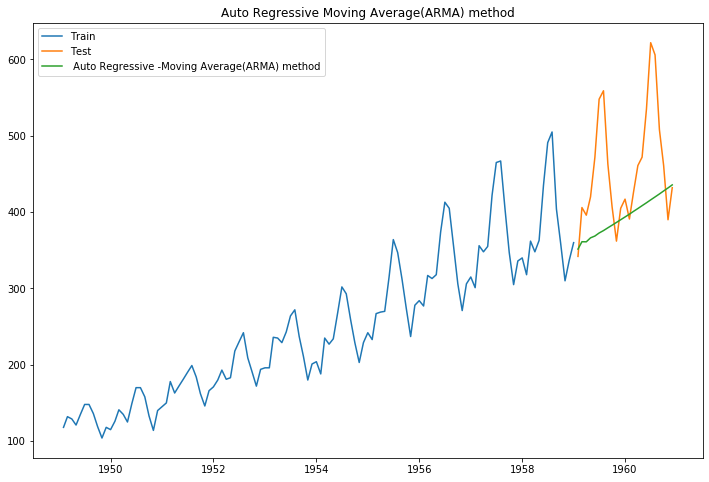

In [110]:
# Plot the forecast
plt.figure(figsize=(12,8))
plt.plot(train['passenger_count'], label= 'Train')
plt.plot(test['passenger_count'], label= 'Test')
plt.plot(y_hat_arma['arma_forecast'][test.index.min():], label= ' Auto Regressive -Moving Average(ARMA) method')
plt.legend(loc='best')
plt.title("Auto Regressive Moving Average(ARMA) method")
plt.show()

In [111]:
rmse = np.sqrt(mean_squared_error(test['passenger_count'], y_hat_arma['arma_forecast'][test.index.min():])).round(2)
mape = np.round(np.mean(np.abs(test['passenger_count']-y_hat_arma['arma_forecast'][test.index.min():])/test['passenger_count'])*100, 2)
Tempresults = pd.DataFrame({'method':['Auto Regressive Moving Average Method'], 'RMSE':[rmse], 'MAPE':[mape]})
Tempresults = Tempresults[['method','RMSE', "MAPE"]]  
Tempresults

,method,RMSE,MAPE
0,Auto Regressive Moving Average Method,93.26,13.8


In [112]:
results = pd.concat([results, Tempresults])
results

,method,RMSE,MAPE
0,Naive Method,121.40,19.68
0,Simple Average Method,221.20,44.36
0,Simple Moving Average Method,104.28,15.67
0,Simple Moving 6 month Average Method,106.78,16.28
0,Simple Exponential Smoothing Method,110.48,17.16
0,Exponential Smoothing Method Level & Trend,71.27,12.75
0,"Exponential Smoothing Method Level ,Trend & S...",34.13,6.37
0,"Exponential Smoothing Method Level ,Trend & S...",33.63,6.69
0,AutoRegressive Method,79.56,11.52
0,Moving Average Method,80.33,11.66


In [113]:
# ARIMA 

#Steps of ARIMA model

#Original time series is differenced to make it stationary
#Differenced series is modeled as a linear regression of
#One or more past observations
#Past forecast errors
#ARIMA model has three parameters
#p: Highest lag included in the regression model
#d: Degree of differencing to make the series stationary
#q: Number of past error terms included in the regression model
#Here the new parameter introduced is the ‘I’ part called integrated. It removes the trend non-stationarity and later integrates the trend to the original series.

In [114]:
model = ARIMA(train_boxcox_data, order=(1,1,1))
model_fit = model.fit()
print(model_fit.params)

const        0.009224
ar.L1.D.y   -0.534431
ma.L1.D.y    0.803363
dtype: float64


/home/santosh/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/santosh/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [115]:
# Recover original time series
y_hat_arima = train_data_boxcox_diff.copy()
y_hat_arima['arima_forecast_boxcox_diff'] = model_fit.predict(data_boxcox_diff.index.min(), data_boxcox_diff.index.max())
y_hat_arima['arima_forecast_boxcox'] = y_hat_arima['arima_forecast_boxcox_diff'].cumsum()
y_hat_arima['arima_forecast_boxcox']  = y_hat_arima['arima_forecast_boxcox'].add(boxcox_data[0])

y_hat_arima['arima_forecast'] = np.exp(y_hat_arima['arima_forecast_boxcox'])

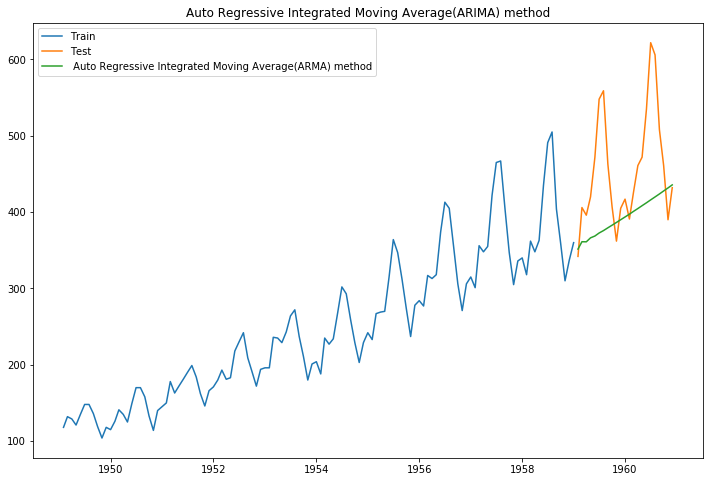

In [116]:
# Plot the forecast
plt.figure(figsize=(12,8))
plt.plot(train['passenger_count'], label= 'Train')
plt.plot(test['passenger_count'], label= 'Test')
plt.plot(y_hat_arima['arima_forecast'][test.index.min():], label= ' Auto Regressive Integrated Moving Average(ARMA) method')
plt.legend(loc='best')
plt.title("Auto Regressive Integrated Moving Average(ARIMA) method")
plt.show()

In [117]:
rmse = np.sqrt(mean_squared_error(test['passenger_count'], y_hat_arima['arima_forecast'][test.index.min():])).round(2)
mape = np.round(np.mean(np.abs(test['passenger_count']-y_hat_arima['arima_forecast'][test.index.min():])/test['passenger_count'])*100, 2)
Tempresults = pd.DataFrame({'method':['Auto Regressive Integrated Integrated Moving Average Method'], 'RMSE':[rmse], 'MAPE':[mape]})
Tempresults = Tempresults[['method','RMSE', "MAPE"]]  
Tempresults

,method,RMSE,MAPE
0,Auto Regressive Integrated Integrated Moving A...,93.26,13.8


In [118]:
results = pd.concat([results, Tempresults])
results

,method,RMSE,MAPE
0,Naive Method,121.40,19.68
0,Simple Average Method,221.20,44.36
0,Simple Moving Average Method,104.28,15.67
0,Simple Moving 6 month Average Method,106.78,16.28
0,Simple Exponential Smoothing Method,110.48,17.16
0,Exponential Smoothing Method Level & Trend,71.27,12.75
0,"Exponential Smoothing Method Level ,Trend & S...",34.13,6.37
0,"Exponential Smoothing Method Level ,Trend & S...",33.63,6.69
0,AutoRegressive Method,79.56,11.52
0,Moving Average Method,80.33,11.66


In [119]:
# SARIMA - Seasonal Auto Regressive Integrated Moving Average
#SARIMA brings all the features of an ARIMA model with an extra feature, seasonality. 
 
#The non-seasonal elements of SARIMA

#Time series is differenced to make it stationary.
#Models future observation as linear regression of past observations and past forecast errors.
#The seasonal elements of SARIMA

#Perform seasonal differencing on time series.
#Model future seasonality as linear regression of past observations of seasonality and past forecast errors of seasonality.

!pip install git+https://github.com/statsmodels/statsmodels.git

In [120]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [121]:
model = SARIMAX(train_boxcox_data, order=(1,1,1), seasonal_order=(1,1,1,12))
model_fit = model.fit()
print(model_fit.params)

/home/santosh/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/santosh/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ar.L1       0.390763
ma.L1      -0.692205
ar.S.L12   -0.050939
ma.S.L12   -0.510255
sigma2      0.001411
dtype: float64


/home/santosh/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [122]:
# Recover original time series
y_hat_sarima = train_data_boxcox_diff.copy()
y_hat_sarima['sarima_forecast_boxcox'] = model_fit.predict(data_boxcox_diff.index.min(), data_boxcox_diff.index.max())
#y_hat_sarima['sarima_forecast_boxcox'] = y_hat_sarima['sarima_forecast_boxcox'].cumsum()
#y_hat_sarima['sarima_forecast_boxcox']  = y_hat_sarima['sarima_forecast_boxcox'].add(boxcox_data[0])

y_hat_sarima['sarima_forecast'] = np.exp(y_hat_sarima['sarima_forecast_boxcox'])

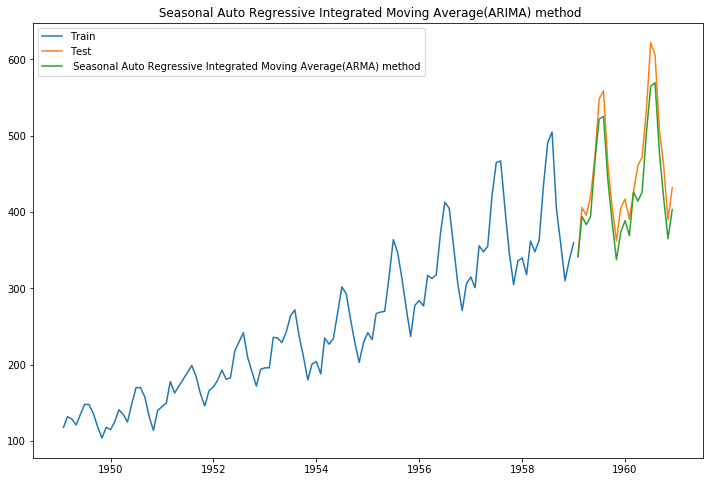

In [123]:
# Plot the forecast
plt.figure(figsize=(12,8))
plt.plot(train['passenger_count'], label= 'Train')
plt.plot(test['passenger_count'], label= 'Test')
plt.plot(y_hat_sarima['sarima_forecast'][test.index.min():], label= ' Seasonal Auto Regressive Integrated Moving Average(ARMA) method')
plt.legend(loc='best')
plt.title(" Seasonal Auto Regressive Integrated Moving Average(ARIMA) method")
plt.show()

In [124]:
rmse = np.sqrt(mean_squared_error(test['passenger_count'], y_hat_sarima['sarima_forecast'][test.index.min():])).round(2)
mape = np.round(np.mean(np.abs(test['passenger_count']-y_hat_sarima['sarima_forecast'][test.index.min():])/test['passenger_count'])*100, 2)
Tempresults = pd.DataFrame({'method':['Seasonal Auto Regressive Integrated Integrated Moving Average Method'], 'RMSE':[rmse], 'MAPE':[mape]})
Tempresults = Tempresults[['method','RMSE', "MAPE"]]  
Tempresults

,method,RMSE,MAPE
0,Seasonal Auto Regressive Integrated Integrated...,29.78,5.62


In [125]:
results = pd.concat([results, Tempresults])
results

,method,RMSE,MAPE
0,Naive Method,121.40,19.68
0,Simple Average Method,221.20,44.36
0,Simple Moving Average Method,104.28,15.67
0,Simple Moving 6 month Average Method,106.78,16.28
0,Simple Exponential Smoothing Method,110.48,17.16
0,Exponential Smoothing Method Level & Trend,71.27,12.75
0,"Exponential Smoothing Method Level ,Trend & S...",34.13,6.37
0,"Exponential Smoothing Method Level ,Trend & S...",33.63,6.69
0,AutoRegressive Method,79.56,11.52
0,Moving Average Method,80.33,11.66


In [126]:
# SARIMAX WITH EXOGENOUS VARIABLE 

#SARIMAX has three components:

#Non-seasonal elements
#Models future observation as a linear regression of past observations and past forecast errors
#Perform differencing to make time-series stationary
#Seasonal elements
#Models seasonality as the linear regression of past observations and past forecast errors from previous seasons.
#Perform seasonal differencing to make time-series stationary over seasons.
#Exogenous variable
#Models future observations as linear regression of external variable

In [127]:
#Determining parameter values
#PACF plots to determine non-seasonal ‘p’ value
#ACF plots to identify non-seasonal ‘q’ value
#Use stationarity tests to determine the  value 'd'
#Use grid search to choose optimal seasonal P, D and Q parameter values

In [128]:
promo = pd.read_csv('promotion.csv', header = None)
promo.columns = ['Month', 'Event']


In [129]:
promo['Month'] = pd.to_datetime(promo['Month'], format = '%Y-%m')

In [130]:
promo= promo.set_index('Month')

In [131]:
promo

,Event
Month,
1949-01-01,0
1949-02-01,0
1949-03-01,0
1949-04-01,0
1949-05-01,0
...,...
1960-08-01,1
1960-09-01,1
1960-10-01,1


In [132]:
promo_train = promo[:train_len]
promo_test = promo[train_len:]

In [133]:
promo_train = promo_train.values.reshape(-1,1) 

In [134]:
model = SARIMAX(train_boxcox_data, order=(1,1,1), seasonal_order=(1,1,1,12), exog=promo_train)
model_fit = model.fit()
print(model_fit.params)

/home/santosh/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/santosh/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


x1         -0.018987
ar.L1       0.431628
ma.L1      -0.710463
ar.S.L12   -0.093478
ma.S.L12   -0.472068
sigma2      0.001399
dtype: float64


In [135]:
# Recover original time series
y_hat_sarimax = train_data_boxcox_diff.copy()
y_hat_sarimax['sarimax_forecast_boxcox'] = model_fit.predict(test.index.min(), test.index.max(), exog= promo_test[:len(promo_test)-1])
#y_hat_sarima['sarima_forecast_boxcox'] = y_hat_sarima['sarima_forecast_boxcox'].cumsum()
#y_hat_sarima['sarima_forecast_boxcox']  = y_hat_sarima['sarima_forecast_boxcox'].add(boxcox_data[0])

y_hat_sarimax['sarimax_forecast'] = np.exp(y_hat_sarimax['sarimax_forecast_boxcox'])

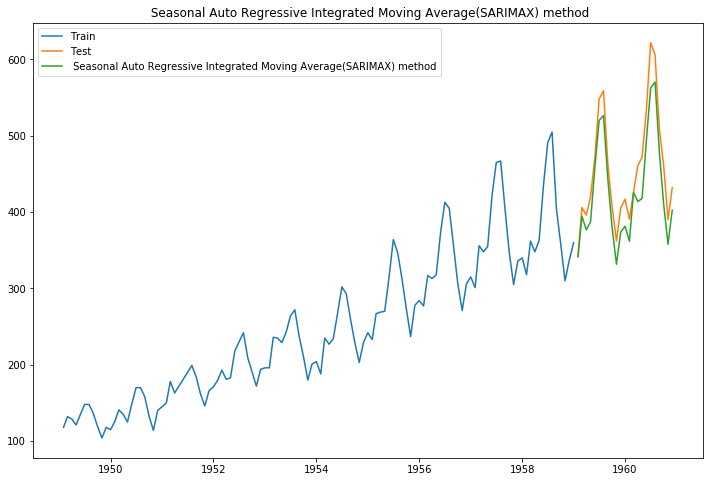

In [136]:
# Plot the forecast
plt.figure(figsize=(12,8))
plt.plot(train['passenger_count'], label= 'Train')
plt.plot(test['passenger_count'], label= 'Test')
plt.plot(y_hat_sarimax['sarimax_forecast'][test.index.min():], label= ' Seasonal Auto Regressive Integrated Moving Average(SARIMAX) method')
plt.legend(loc='best')
plt.title(" Seasonal Auto Regressive Integrated Moving Average(SARIMAX) method")
plt.show()

In [137]:
rmse = np.sqrt(mean_squared_error(test['passenger_count'], y_hat_sarimax['sarimax_forecast'][test.index.min():])).round(2)
mape = np.round(np.mean(np.abs(test['passenger_count']-y_hat_sarimax['sarimax_forecast'][test.index.min():])/test['passenger_count'])*100, 2)
Tempresults = pd.DataFrame({'method':['Seasonal Auto Regressive Integrated Integrated Moving Average Exogus Method'], 'RMSE':[rmse], 'MAPE':[mape]})
Tempresults = Tempresults[['method','RMSE', "MAPE"]]  
Tempresults

,method,RMSE,MAPE
0,Seasonal Auto Regressive Integrated Integrated...,33.3,6.46


In [138]:
results = pd.concat([results, Tempresults])
results

,method,RMSE,MAPE
0,Naive Method,121.40,19.68
0,Simple Average Method,221.20,44.36
0,Simple Moving Average Method,104.28,15.67
0,Simple Moving 6 month Average Method,106.78,16.28
0,Simple Exponential Smoothing Method,110.48,17.16
0,Exponential Smoothing Method Level & Trend,71.27,12.75
0,"Exponential Smoothing Method Level ,Trend & S...",34.13,6.37
0,"Exponential Smoothing Method Level ,Trend & S...",33.63,6.69
0,AutoRegressive Method,79.56,11.52
0,Moving Average Method,80.33,11.66
